In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
files = os.listdir("Data/")
print(files)

['damage168.MOV', 'damage84.MOV', 'nodamage.MOV']


In [4]:
Data_path = "Data/"
video_path = Data_path + files[1]
print(video_path)

Data/damage84.MOV


In [5]:
cap = cv2.VideoCapture(video_path)

#video information
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

print("Total number of frames is:",frameCount)
print("FPS is:", fps)

Total number of frames is: 43466
FPS is: 239


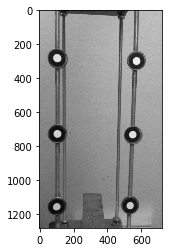

In [6]:
# Read the first frame of the video
ret, frame = cap.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
frame = cv2.transpose(frame)
plt.imshow(frame, cmap = 'gray')

In [7]:
r = cv2.selectROI(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


(491.0, 218.0, 160.0, 162.0)


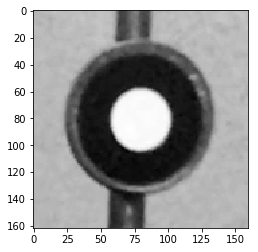

In [12]:
print(r)
old_frame = frame[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
plt.imshow(old_frame, cmap = 'gray')

In [15]:
ret, new_frame = cap.read()
new_frame = cv2.cvtColor(new_frame,cv2.COLOR_BGR2GRAY)
new_frame = cv2.transpose(new_frame)
new_frame = new_frame[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

In [16]:
flow = cv2.calcOpticalFlowFarneback(old_frame, new_frame, None,0.5, 3, 15, 3, 5, 1.2, 0)
flow = np.array(flow)
print(flow.shape)

(162, 160, 2)


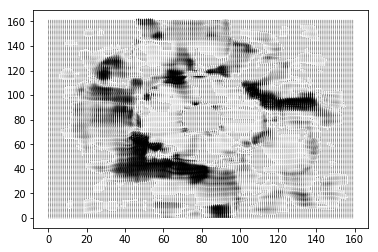

In [17]:
plt.quiver(flow[...,0],flow[...,1])

In [22]:
# This function computes the optical flow for all the consequitive frames of the video
def optical_flow(cap, total_time,r):
    
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    Flow = []
    ret, old_frame = cap.read()
    
    old_frame = old_frame[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    
    for i in range(fps * total_time):
        ret, new_frame = cap.read()
        new_frame = new_frame[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

        
        prvs = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
        new = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvs, new, None,0.5, 3, 15, 3, 5, 1.2, 0)
        Flow.append(flow)
        old_frame = new_frame

    return np.array(Flow)

In [23]:
Flow = optical_flow(cap, 1,r)